# Chapter 4: The Game of Life

<img src="GL_fig_01.png" alt="title" width="600px" />

## Motivation

**The Game of Life**: a 2-dimensional cellular automata with very simple rules that exhibits complex behaviour. It has been shown to be Turing complete.

John von Neumann's definition of life: an entity that can reproduce itself and simulate a Turing machine.

**Cellular automata**: 
- Fixed, simple rules to describe complex phenomena.

### Cellular automata

<img src="GL_fig_02.jpg" alt="title" width="600px" />

**Applications**: 
1. **Physics**: Fluid mechanics, Phase transitions, Transport, Electromagnetic theory, ...
2. **Biology**: Patterns on seashell, on skin of cephalopods; Fibroplasts' interactions, Collective cells migrations, ...
3. **Chemistry** and **Material science**: Non-equilibrium reactions, Aggregation, 
4. **Computer science**: Cryptography, Random number generations, ...
5. **Urban planning**: Models of traffic, propagation of EM waves in an urban context, ...

## Application example 1: Cellular automata and lattice Boltzmann methods: a new approach to computational fluid dynamics and particle transport


[Cellular automata and lattice Boltzmann methods: a new approach to computational fluid dynamics and particle transport](https://www.sciencedirect.com/science/article/pii/S0167739X99000503)

<img src="GL_fig_03.png" alt="title" width="600px" />

## Application example 2: OpenLB - Open source lattice Boltzmann code


[OpenLB - Open source lattice Boltzmann code](https://www.sciencedirect.com/science/article/pii/S0898122120301875)

<img src="GL_fig_04.jpg" alt="title" width="600px" />

## One-dimensional cellular automata

<img src="GL_fig_05.png" alt="title" width="600px" />

Cells are organized on a line: each cells have two neighbours.

Each cell can have value 0 or 1. 

Each round: the status of all cell is updated simultaneously.
The new status of a cell depends on its status and the status of its two neighbors.

There can be only $2^8$ cellular automata of this kind.


## Simulation of 1-d cellular automata

**Rule**:

Each cellular automaton is identified by a *code* between 0 and 256.

Example: Rule 184

$$
    \begin{array}{|c|c|c|c|c|c|c|c|c|}
        \hline
        {\bf Current\ pattern} & 111 & 110 & 101 & 100 & 011 & 010 & 001 & 000 \\ 
        \hline
        {\bf New\ value\ for\ center\ cell} & 1    & 0     &  1   & 1  & 1    & 0    & 0  & 0  \\ 
        \hline
    \end{array}
$$

$2^{7} + 2^{5} + 2^{4} + 2^{3} = 184$

### Function implementing a 1-d cellular automaton

Implement a function applying a rule on a status to obtain the next step.

In [6]:
import numpy as np 
    
def apply_rule_1d(n_rule, status):
    """
    Function to apply a rule on a status. Return the next status.
    
    Parameters
    ==========
    n_rule : Code of the rule.
    status : Current status.
    """
    
    N = len(status)  # Dimensions of 1-d lattice of the CA.
    next_status = np.zeros(N) 
    
    rules = np.zeros(8) + n_rule;
    q = n_rule
    for i in range(8):
        rules[i] = q % 2
        q = (q - q % 2) // 2
    
    # Use periodic boundary conditions.
    for i in range(N):
        c = status[(i - 1) % N] * 4 + status[i] * 2 + status[(i + 1) % N] * 1
        next_status[i] = rules[int(c)]
    
    return next_status

### Simulation

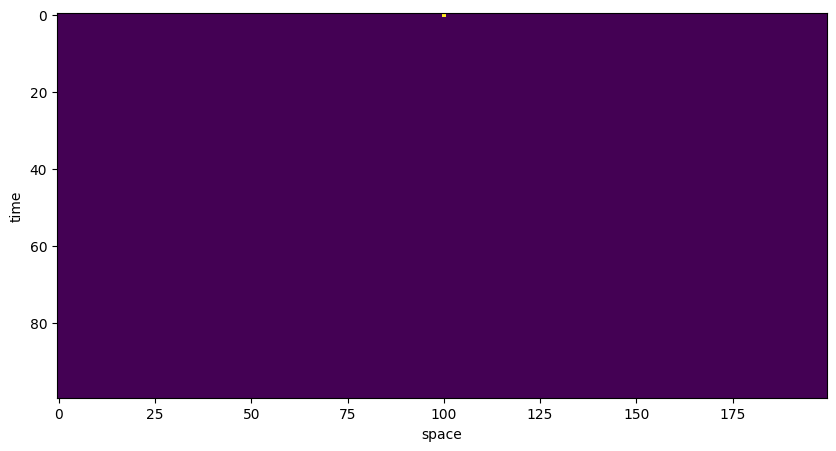

In [7]:
from IPython.display import clear_output
from matplotlib import pyplot as plt

n_rule = 30 # Try: 184, 90, 30, 110, 165.
N = 200  # Lattice dimension.
T = 100  # Iterations.


# Status with all zeros and a single 1 in the middle.
status = np.zeros(N)  # initialize status
status[N // 2] = 1

# Random status.
# status = np.random.randint(2, size=N)

sequence = np.zeros([T, N])
sequence[0, :] = status
for t in range(T):
    
    plt.figure(figsize=(10, 5))
    plt.imshow(sequence)
    plt.xlabel('space')
    plt.ylabel('time')
    plt.show()
    
    if input("Press Enter to continue to the next image...") == 'x':
        break
    elif t == T - 1:
        break
    else:
        clear_output(wait=True)  # Clear previous output
    
    new_status = apply_rule_1d(n_rule, status)
    sequence[t + 1, :] = new_status
    status = new_status

## Simulation of the Game of Life

<img src="GL_fig_06.png" alt="title" width="600px" />

**Rules**:

For a dead cell:
$$
\begin{array}{cc}
    {\bf Number\ of\ alive\ neighbors} & {\bf Next\ generation} \\[3pt]
            1, 2 & {\rm remains\ dead} \\
            3 & {\rm a\ new\ alive\ cell\ is\ born} \\
            4, 5, 6, 7, 8 & {\rm remains\ dead} \\ 
\end{array} 
$$


For an alive cell:
$$
\begin{array}{cc}
    {\bf Number\ of\ alive\ neighbors} & {\bf Next\ generation} \\[3pt]
    1 & {\rm dies\ (loneliness)} \\
    2, 3 & {\rm remains\ alive} \\
    4, 5, 6, 7, 8 & {\rm dies\ (overpopulation)} \\ 
\end{array} 
$$


Let's implement a function that returns the number of neighbors.

In [8]:
def neighbors_Moore(status):
    """
    Function to return the number of neighbors for each cell in status.
    
    Parameters
    ==========
    status : Current status.
    """

    # Initialize the neighbor count array
    n_nn = (
        np.roll(status, 1, axis=0) +  # Up.
        np.roll(status, -1, axis=0) +  # Down.
        np.roll(status, 1, axis=1) +  # Left.
        np.roll(status, -1, axis=1) +  # Right.
        np.roll(np.roll(status, 1, axis=0), 1, axis=1) +  # Up-Left.
        np.roll(np.roll(status, 1, axis=0), -1, axis=1) +  # Up-Right
        np.roll(np.roll(status, -1, axis=0), 1, axis=1) +  # Down-Left
        np.roll(np.roll(status, -1, axis=0), -1, axis=1)  # Down-Right
    )

    return n_nn

Let's implement a function that apply the 2-d rule.

In [9]:
def apply_rule_2d(rule_2d, status):
    """
    Function to apply a 2-d rule on a status. Return the next status.
    
    Parameters
    ==========
    rule_2d : Array with size [2, 9]. Describe the CA rule.
    status : Current status.
    """
    
    Ni, Nj = status.shape  # Dimensions of 2-D lattice of the CA.
    next_status = np.zeros([Ni, Nj]) 
    
    # Find the number of neighbors.
    n_nn = neighbors_Moore(status) 
    for i in range(Ni):
        for j in range(Nj):
            next_status[i, j] = rule_2d[int(status[i, j]), int(n_nn[i, j])]
        
    return next_status

### Simulation of the Game of Life.

Visualization every time step.

In [10]:
import numpy as np 
import time
from tkinter import *

N = 100
gol = np.zeros([N, N])

# Random initial state.
gol = np.random.randint(2, size=[N, N])

rule_2d = np.zeros([2, 9])

# Majority Rules.
rule_2d[0, :] = [0, 0, 0, 0, 0, 1, 1, 1, 1]
rule_2d[1, :] = [0, 0, 0, 0, 1, 1, 1, 1, 1]

Ni, Nj = gol.shape  # Sets the variables describing the shape.
N_skip = 1 # Visualize status every N_skip steps. 
window_size = 600

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window.
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)

step = 0

def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running and step < 100:

    gol = apply_rule_2d(rule_2d, gol)
        
    # Update animation frame.
    if step % N_skip == 0:        
        canvas.delete('all')
        gol_cells = []
        for i in range(Ni):
            for j in range(Nj):
                gol_cell_color = '#FFFFFF' if gol[i, j] == 1 \
                else '#000000' 
                gol_cells.append(
                    canvas.create_rectangle(
                        j / Nj * window_size, 
                        i / Ni * window_size,
                        (j + 1) / Nj * window_size, 
                        (i + 1) / Ni * window_size,
                        outline='', 
                        fill=gol_cell_color,
                    )
                )
        
        tk.title(f'Iteration {step}')
        tk.update_idletasks()
        tk.update()
        time.sleep(0.1)  # Increase to slow down the simulation.

    step += 1
    
tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).

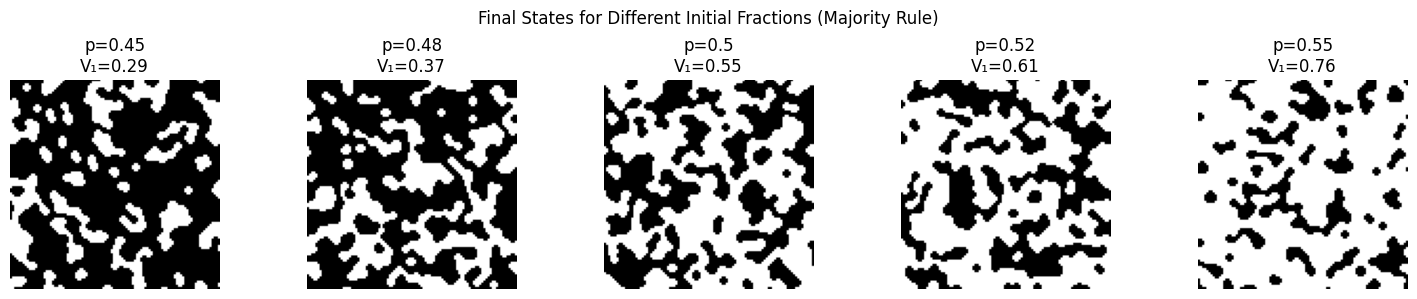

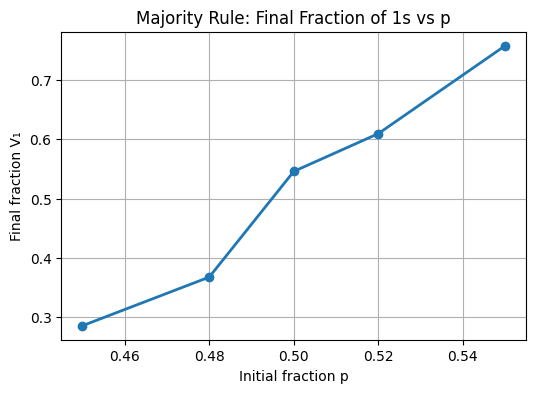


Observation (C):
For p < 0.5, the system tends to all 0s; for p > 0.5, it tends to all 1s.
Around p ≈ 0.5, mixed domains form and boundaries remain stable (due to tie rule at 4 neighbors).


In [11]:
p_values = [0.45, 0.48, 0.50, 0.52, 0.55]
V1_values = []
final_states = []

for p in p_values:
    gol = (np.random.rand(N, N) < p).astype(int)
    prev = np.copy(gol)
    
    # evolve until stable
    for _ in range(200):
        gol = apply_rule_2d(rule_2d, gol)
        if np.array_equal(gol, prev):
            break
        prev = np.copy(gol)

    V1 = np.mean(gol)
    V1_values.append(V1)
    final_states.append(gol)

# (A) Plot final states
fig, axes = plt.subplots(1, len(p_values), figsize=(15, 3))
for i, p in enumerate(p_values):
    axes[i].imshow(final_states[i], cmap='gray')
    axes[i].set_title(f"p={p}\nV₁={V1_values[i]:.2f}")
    axes[i].axis('off')
plt.suptitle("Final States for Different Initial Fractions (Majority Rule)")
plt.tight_layout()
plt.show()

# (B) Plot V₁(p)
plt.figure(figsize=(6,4))
plt.plot(p_values, V1_values, 'o-', lw=2)
plt.xlabel("Initial fraction p")
plt.ylabel("Final fraction V₁")
plt.title("Majority Rule: Final Fraction of 1s vs p")
plt.grid(True)
plt.show()

# (C) Observation
print("\nObservation (C):")
print("For p < 0.5, the system tends to all 0s; for p > 0.5, it tends to all 1s.")
print("Around p ≈ 0.5, mixed domains form and boundaries remain stable (due to tie rule at 4 neighbors).")